# Step:1

# Business Case:

- FicZon Inc is an IT solution provider with products ranging from onpremises products to SAAS based solutions. FicZon major leadsgeneration channel is digital and through their website.
- FicZon business is majorly dependent on the sales forceeffectiveness. As the market is maturing and more new competitorsentering the market, FicZon is experiencing the dip in sales.
- Effective sales is dependent on lead quality and as of now, this isbased on manual categorization and highly depended on sales staff.
- Though there is a quality process, which continuously updates thelead categorization, it’s value is in for post analysis, rather thanconversation.
- FicZon wants to explore Machine Learning to pre-categorize the leadquality and as result, expecting significant increase in saleseffectiveness.

# PROJECT GOAL:
1. Data exploration insights – Sales effectiveness.
2. ML model to predict the Lead Category (High Potential , Low
Potential)

In [1]:
pwd

'C:\\Users\\Rashmi\\Downloads'

In [2]:
## Installing SQL
!pip install sqlalchemy
!pip install pymysql

In [3]:
## Importing libraries
from sqlalchemy import create_engine
import pandas as pd

# Step 2:-   
## Data Collection

### DB Name: project_sales
### Table Name: data
### Host: 18.136.157.135
### Port: 3306
### Username: dm_team2
### Password: DM!$Team&27@9!20!

In [4]:
## Importing libraries
import warnings
warnings.filterwarnings("ignore")

In [5]:
## Connecting to database
db_host = '18.136.157.135' # port:  3306
username = 'dm_team2'
user_pass = 'DM!$Team&27@9!20!'
db_name = 'project_sales'

conn = create_engine('mysql+pymysql://'+username+':'+user_pass+'@'+db_host+'/'+db_name)
conn.table_names()

['data']

In [6]:
'mysql+pymysql://'+username+':'+user_pass+'@'+db_host+'/'+db_name

'mysql+pymysql://dm_team2:DM!$Team&27@9!20!@18.136.157.135/project_sales'

In [7]:
## Selecting Required dataset
query = "select * from data" # SQL statement
tabels = pd.read_sql(query,conn)
tabels

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [8]:
## Converting data to csv file
tabels.to_csv('clyint.csv')

In [9]:
## Reading the data
import pandas as pd
data=pd.read_csv("clyint.csv")

In [10]:
data

,Unnamed: 0,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...,...
7417,7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [11]:
data.Status.unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

# Domain Analysis

## Created
- The status is generated at what time is know as Created

## Product_ID
- The id is given by the sales team for identifying the query

# Source
- which something originates or can be obtained.

## Mobile
- a telephone with access to a cellular radio system so it can be used over a wide area, without a physical connection to a network

## EMAIL
- messages distributed by electronic means from one computer user to one or more recipients via a network.

## Sales_Agent
- one who is authorized or appointed by a manufacturer to sell or distribute his products within a given territory but who is self-employed, takes title to the goods, and does not act as agent for a principal.

## Location
- a particular place or position.

## Delivery mode
- delivery mode is the way training instructions are delivered to support and enable learning process. In mobile learning there are several modes of instructions.

## Status
- The field is typically used to communicate the status of a record to both the reporting users and the sales rep who is working the lead

# Basic checks

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7422 non-null   int64  
 1   Created        7422 non-null   object 
 2   Product_ID     7364 non-null   float64
 3   Source         7405 non-null   object 
 4   Mobile         5612 non-null   object 
 5   EMAIL          7422 non-null   object 
 6   Sales_Agent    7399 non-null   object 
 7   Location       7364 non-null   object 
 8   Delivery_Mode  7422 non-null   object 
 9   Status         7422 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 580.0+ KB


In [13]:
data.head()

,Unnamed: 0,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [14]:
data.tail()

,Unnamed: 0,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,7421,28-04-2018 07:54,25.0,Website,NaN,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [15]:
data.describe()

,Unnamed: 0,Product_ID
count,7422.000000,7364.000000
mean,3710.500000,15.947311
std,2142.691182,6.072937
min,0.000000,0.000000
25%,1855.250000,12.000000
50%,3710.500000,18.000000
75%,5565.750000,19.000000
max,7421.000000,28.000000


In [16]:
data.describe(include='O')

,Created,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7405,5612,7422,7399,7364,7422,7422
unique,6752,25,486,883,12,17,5,11
top,27-09-2018 11:00,Call,XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,2547,222,1701,1500,2500,2975,1536


In [17]:
data.shape

(7422, 10)

In [18]:
data.Created.value_counts()

27-09-2018 11:00    4
15-10-2018 10:36    4
10-05-2018 12:30    4
14-09-2018 12:00    4
26-09-2018 11:30    4
                   ..
30-10-2018 14:44    1
02-05-2018 13:19    1
30-04-2018 14:30    1
14-07-2018 15:50    1
09-06-2018 20:49    1
Name: Created, Length: 6752, dtype: int64

In [19]:
data.Product_ID.value_counts()
data.Product_ID.isnull().sum()

58

In [20]:
data.Source.value_counts()

Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Live Chat-CPC                      50
Personal Contact                   50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Youtube                   2
SMS Campaign                        2
Live Chat-Quora                     2
Other                               2
Live Chat-Justdial                  1
E-Mail Message                      1
Name: Source, dtype: int64

In [21]:
data.Mobile.value_counts()

XXXXXXX       222
988XXXXXXX    211
984XXXXXXX    177
998XXXXXXX    125
994XXXXXXX    112
             ... 
±91XXXXXXX      1
642XXXXXXX      1
267XXXXXXX      1
(31XXXXXXX      1
380XXXXXXX      1
Name: Mobile, Length: 486, dtype: int64

In [22]:
data.EMAIL.value_counts()

#VALUE!               1701
sXXXXXXX@gmail.com     781
aXXXXXXX@gmail.com     445
rXXXXXXX@gmail.com     342
mXXXXXXX@gmail.com     305
                      ... 
mXXXXXXXggsinc.com       1
cXXXXXXXngbags.com       1
hXXXXXXXvan@ge.com       1
MXXXXXXXlowpol.com       1
nXXXXXXXieblog.com       1
Name: EMAIL, Length: 883, dtype: int64

In [23]:
data.Location.value_counts()

Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [24]:
data.Delivery_Mode.value_counts()

Mode-5    2975
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: Delivery_Mode, dtype: int64

In [25]:
data.Status.value_counts()

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: Status, dtype: int64

# Step 3:-
### Identify the independent and dependent variable.

## Target:-
### Status

# Step 4:-
# Exploratory Data Analysis

## UNIVARIATE ANALYSIS

In [26]:
data.columns

Index(['Unnamed: 0', 'Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL',
       'Sales_Agent', 'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [27]:
import pandas_profiling

In [28]:
data.profile_report()

In [29]:

import sweetviz as sv
my_report = sv.analyze(data)## pass the original dataframe
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Insights of Univariate analysis
#### PRODUCT_ID : 
From 15 to 18 is the most frequently used product id

#### SOURCE :
Call, live Chat-Direct and website are the most used source to receive the service.

#### SALES_AGENT :
Sales agent-4, salse agent-11 and sales agent-5 these are the sales agents that have provided the service the most.

#### LOCATION :
It seems that from Bangalore, Chennai and other locations(as mentioned in the data) have the highest product deliveries.

#### DELIVERY MODE :
It seems that Mode-5, Mode-1, Mode-3 are the mode of delivery that highly choosen by the customers.There is no delivery happened through Mode-2.

#### STATUS :
Juck lead and not responding are the top categoris that are occurred more often.

In [30]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns

## Bivariate Analysis

In [31]:
data1=data[['Product_ID', 'Source',
       'Sales_Agent', 'Location', 'Delivery_Mode']]
data1.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,NaN,Website,Sales-Agent-11,NaN,Mode-5
1,NaN,Website,Sales-Agent-10,NaN,Mode-5
2,NaN,Website,Sales-Agent-10,NaN,Mode-5
3,NaN,Website,Sales-Agent-10,NaN,Mode-5
4,NaN,Website,Sales-Agent-10,NaN,Mode-5


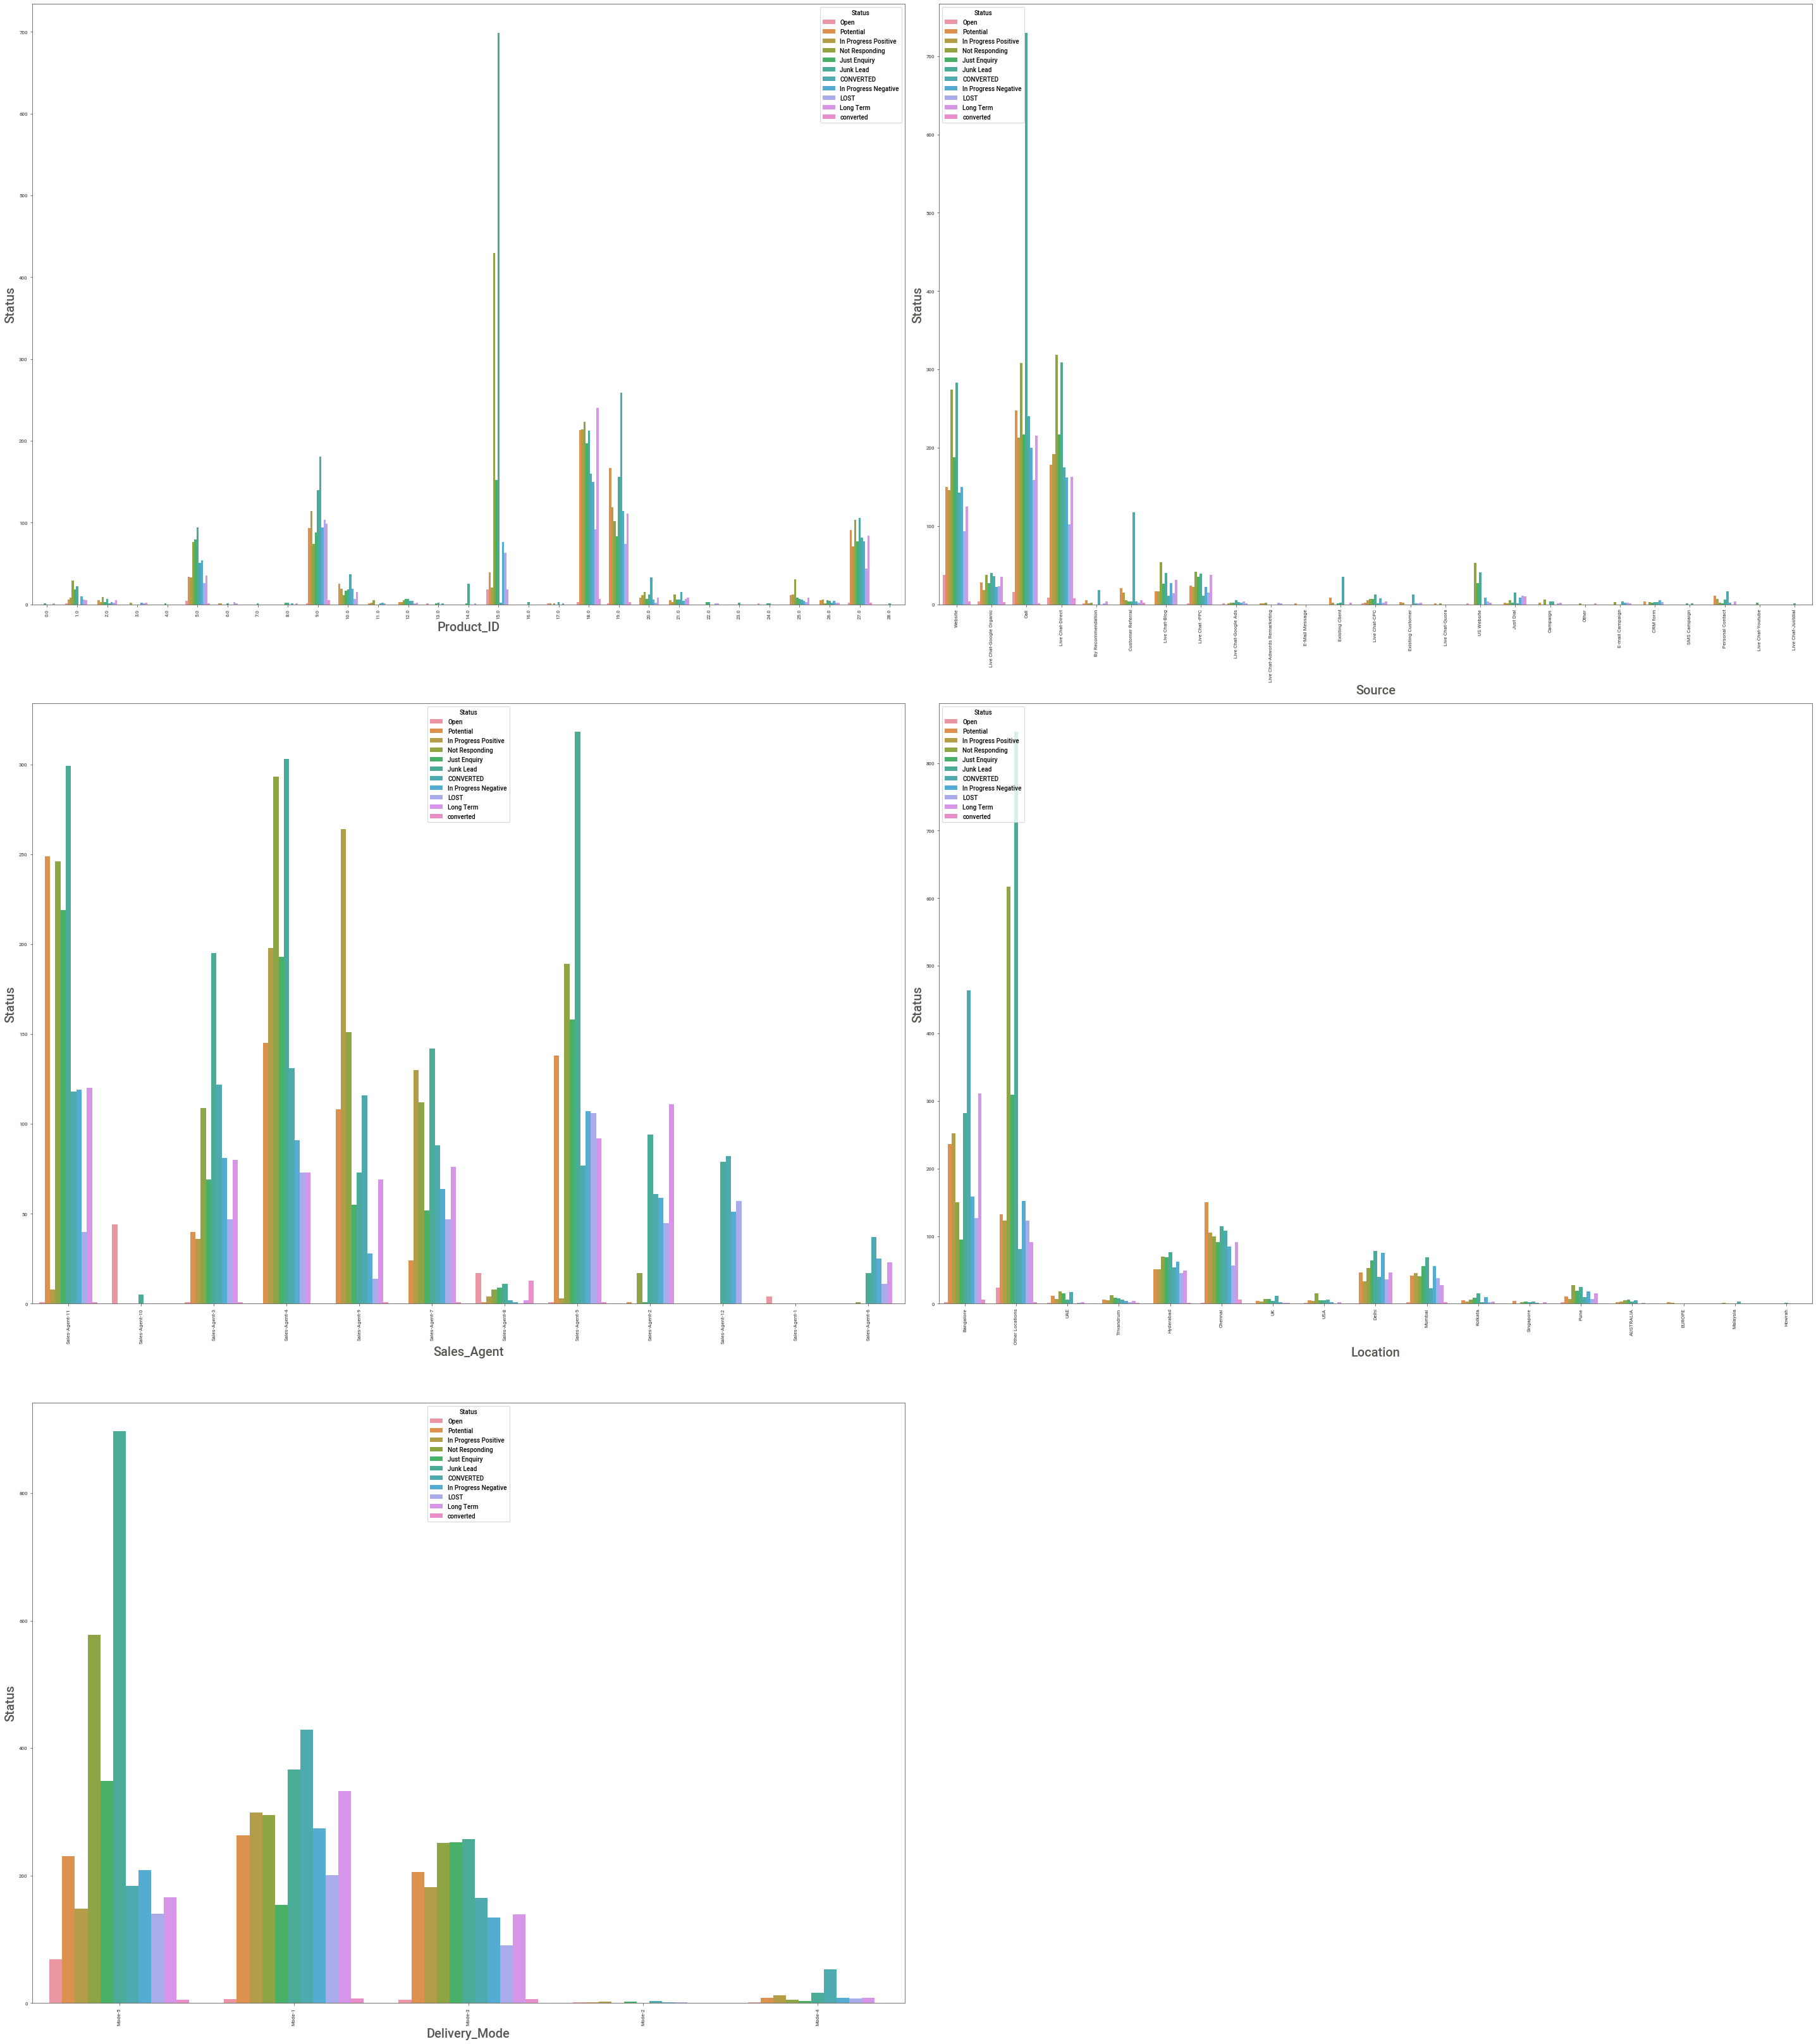

In [32]:
# Plotting how every  discrete feature correlate with the "target"
plt.figure(figsize=(40,45), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=5 :
        ax = plt.subplot(3,2,plotnumber)
        sns.countplot(x=data1[column].dropna(axis=0)
                        ,hue=data.Status)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Status',fontsize=20)
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

## Insights of Bivariate analysis
#### PRODUCT ID :
It ranges from 0 to 28.
>In Product_id-15 JUNK LEAD and NOT RESPONDING has the highest count i,e if the Product_id is 15 then there is more chance of getting Status as JUNK LEAD or NOT RESPONDING.

>In Product_id-18 LONG TERM has the highest count as Status.

>In Product_id-19 JUNK LEAD has the highest count.

>In Product_id-27 every Status is equaly distributed.

>Products with the Product_id as 2, 3, 4, 6, 7, 8, 11, 13, 16, 17, 22, 23, 24, 28 are having less count in Status i,e these products are not getting purchased in large amount.  

#### SOURCE :
There are 25 sources/methods to purchase a products.
>In Source, via call most of the products getting purchased and it has JUNK LEAD as it's main Status.

>The products which are getting purchased via website has most of the Status as JUNK LEAD or NOT RESPONDING.

>The products which are getting purchased via live chat-direct has most of the Status as JUNK LEAD or NOT RESPONDING.

>Customer referral has the JUNK LEAD as it's main Status.

>Rest of the sources has very less impact on Status variable i,e there is no effective number of deliveries of products happened through these Sources.


#### SALES AGENT :
There are 12 sales agents that are associated with the company.
>Almost every Sales Agent has the JUNK LEAD as it's main Status.

>Through Sales Agent-5 most of the products delivered got the Status as JUNK LEAD.

>Through Sales Agent-4 most of the product delivered got the Status as JUNK LEAD or NOT RESPONDING.

>Through Sales Agent-11 most of the product delivered got the Status as JUNK LEAD, NOT RESPONDING or POTENTIAL.

>Sales Agent-10 and Sales Agent-1 have no much entries, in other words we can also say that there is no effective number of product delivery happened through these agents.


#### LOCATION :
Bangalore, Chennai and other locations(as mentioned in the data) has the highest count in Status i,e more number of product provided to these locations.
>Bangalore has got JUNK LEAD and LONG TERM as its main Status.

>Other locations has got JUNK LEAD and NOT RESPONDING as its main Status.

>Chennai has POTENTIAL as its main Status.

####  DELIVERY MODE :
In Delivery Mode there are 5 modes in order to deliver a product.
>Mode-5 has highest count in Status and JUNK LEAD is the Status of most of the delivered products.

>In Mode-1 JUNK LEAD is the Status of most of the delivered products.

>In Mode-3 every products that are delivered has got equaly distributed Status.

>In Mode-4  JUNK LEAD is the Status of most of the delivered products.

>Very less amount of deliveries happened through Mode-2.


# step 5:-
# Data preprocessing
        
- Impute missing values

- Check for outliers

- Convert categorical to numerical

- Feature scaling

- Handle imbalance dataset

In [33]:
## Checking missing values
data.isnull().sum()

Unnamed: 0          0
Created             0
Product_ID         58
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
dtype: int64

In [34]:
## Imputing the nan values
data.Location=data.Location.fillna('Other Locations')

In [35]:
data.Source=data.Source.fillna('Call')

In [36]:
data.Sales_Agent.isnull().sum()

23

In [37]:
data.Source.value_counts()

Call                             2564
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Live Chat-CPC                      50
Personal Contact                   50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Youtube                   2
SMS Campaign                        2
Live Chat-Quora                     2
Other                               2
Live Chat-Justdial                  1
E-Mail Message                      1
Name: Source, dtype: int64

In [38]:
data.Source.isnull().sum()

0

In [39]:
## Encoding the elements of the column
data.loc[data['Source']=='Call','Source']='offline_call'
data.loc[data['Source']=='Customer Referral','Source']='call'
data.loc[data['Source']=='Existing Client','Source']='call'
data.loc[data['Source']=='Personal Contact','Source']='call'
data.loc[data['Source']=='By Recommendation','Source']='call'
data.loc[data['Source']=='CRM form','Source']='call'
data.loc[data['Source']=='Existing Customer','Source']='call'
data.loc[data['Source']=='Campaign','Source']='call'
data.loc[data['Source']=='Other','Source']='call'
data.loc[data['Source']=='SMS Campaign','Source']='call'
data.loc[data['Source']=='Live Chat-Direct','Source']='live_chat'
data.loc[data['Source']=='Live Chat-Blog','Source']='live_chat'
data.loc[data['Source']=='Live Chat -PPC','Source']='live_chat'
data.loc[data['Source']=='Live Chat-Google Organic ','Source']='live_chat'
data.loc[data['Source']=='Live Chat-CPC','Source']='live_chat'
data.loc[data['Source']=='Live Chat-Google Ads','Source']='live_chat'
data.loc[data['Source']=='Live Chat-Adwords Remarketing','Source']='live_chat'
data.loc[data['Source']=='Live Chat-Quora','Source']='live_chat'
data.loc[data['Source']=='Live Chat-Youtube','Source']='live_chat'
data.loc[data['Source']=='Live Chat-Justdial','Source']='live_chat'
data.loc[data['Source']=='Website','Source']='website_direct'
data.loc[data['Source']=='US Website','Source']='website_online'
data.loc[data['Source']=='Just Dial','Source']='website_online'
data.loc[data['Source']=='E-mail Campaign','Source']='website_online'
data.loc[data['Source']=='E-Mail Message','Source']='website_direct'



In [40]:
data.Source.value_counts()

offline_call                2564
live_chat                   2403
website_direct              1595
call                         381
Live Chat-Google Organic     274
website_online               205
Name: Source, dtype: int64

In [41]:
## Reducing the unique values to 3 by Encoding
data.loc[data['Source']=='call','Source']='offline_call'
data.loc[data['Source']=='website_direct','Source']='website_online'
data.loc[data['Source']=='Live Chat-Google Organic','Source']='live_chat'

In [42]:
data.Source.value_counts()

offline_call      2945
live_chat         2677
website_online    1800
Name: Source, dtype: int64

In [43]:
data.Location.value_counts()

Other Locations    2558
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [44]:
data.Location.isnull().sum()

0

In [45]:
## Encoding
data.loc[data['Location']=='Bangalore','Location']='INDIA'
data.loc[data['Location']=='Chennai','Location']='INDIA'
data.loc[data['Location']=='Hyderabad','Location']='INDIA'
data.loc[data['Location']=='Delhi','Location']='INDIA'
data.loc[data['Location']=='Mumbai','Location']='INDIA'
data.loc[data['Location']=='Pune','Location']='INDIA'
data.loc[data['Location']=='Trivandrum','Location']='INDIA'
data.loc[data['Location']=='Kolkata','Location']='INDIA'
data.loc[data['Location']=='Howrah','Location']='INDIA'

In [46]:
data.Location.value_counts()

INDIA              4650
Other Locations    2558
UAE                  79
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Name: Location, dtype: int64

In [47]:
## Manually labelling values as high potential and low potential based on its nature
data.loc[data['Status']=='Junk Lead','Status']='low_potential'
data.loc[data['Status']=='Not Responding','Status']='low_potential'
data.loc[data['Status']=='In Progress Positive','Status']='high_potential'
data.loc[data['Status']=='In Progress Negative','Status']='low_potential'
data.loc[data['Status']=='LOST','Status']='low_potential'
data.loc[data['Status']=='Open','Status']='high_potential'
data.loc[data['Status']=='Long Term','Status']='high_potential'
data.loc[data['Status']=='Just Enquiry','Status']='low_potential'
data.loc[data['Status']=='CONVERTED','Status']='high_potential'
data.loc[data['Status']=='Potential','Status']='high_potential'
data.loc[data['Status']=='converted','Status']='high_potential'

In [48]:
data.Sales_Agent.value_counts()

Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

In [49]:
## imputing nan values
data.Sales_Agent=data.Sales_Agent.fillna('Sales-Agent-4')

In [50]:
data.Sales_Agent.value_counts()

Sales-Agent-4     1523
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

## Outliers
- there is no numerical data so there is no need to check outliers 
- and as well as scalling also not required

## Convert categorical to numerical

In [51]:
## converting to numerical 
data.loc[data['Source']=='offline_call','Source']=1
data.loc[data['Source']=='live_chat','Source']=2
data.loc[data['Source']=='website_online','Source']=3

data['Source'] = pd.to_numeric(data['Source'])

In [52]:
## conversing to numerical 
data.loc[data['Location']=='INDIA','Location']=1
data.loc[data['Location']=='Other Locations','Location']=2
data.loc[data['Location']=='UAE','Location']=3
data.loc[data['Location']=='USA','Location']=4
data.loc[data['Location']=='UK','Location']=5
data.loc[data['Location']=='AUSTRALIA','Location']=6
data.loc[data['Location']=='Singapore','Location']=7
data.loc[data['Location']=='Malaysia','Location']=8
data.loc[data['Location']=='EUROPE','Location']=9
data['Location'] = pd.to_numeric(data['Location'])

In [53]:
## conversing to numerical 
data.loc[data['Status']=='high_potential','Status']=1
data.loc[data['Status']=='low_potential','Status']=0
data['Status'] = pd.to_numeric(data['Status'])
data.Status.value_counts()

0    4491
1    2931
Name: Status, dtype: int64

In [54]:
## Label Encoder
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data.Sales_Agent=label.fit_transform(data.Sales_Agent)
data.Delivery_Mode=label.fit_transform(data.Delivery_Mode)


In [55]:
data.Delivery_Mode.value_counts()

4    2975
0    2627
2    1688
3     121
1      11
Name: Delivery_Mode, dtype: int64

In [56]:
data.describe()

,Unnamed: 0,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
count,7422.000000,7364.000000,7422.000000,7422.000000,7422.000000,7422.000000,7422.000000
mean,3710.500000,15.947311,1.845729,5.997036,1.443816,2.108596,0.394907
std,2142.691182,6.072937,0.784601,2.847703,0.743119,1.739406,0.488864
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1855.250000,12.000000,1.000000,4.000000,1.000000,0.000000,0.000000
50%,3710.500000,18.000000,2.000000,6.000000,1.000000,2.000000,0.000000
75%,5565.750000,19.000000,2.000000,7.000000,2.000000,4.000000,1.000000
max,7421.000000,28.000000,3.000000,11.000000,9.000000,4.000000,1.000000


# step 6:-
# Feature Selection

<AxesSubplot:>

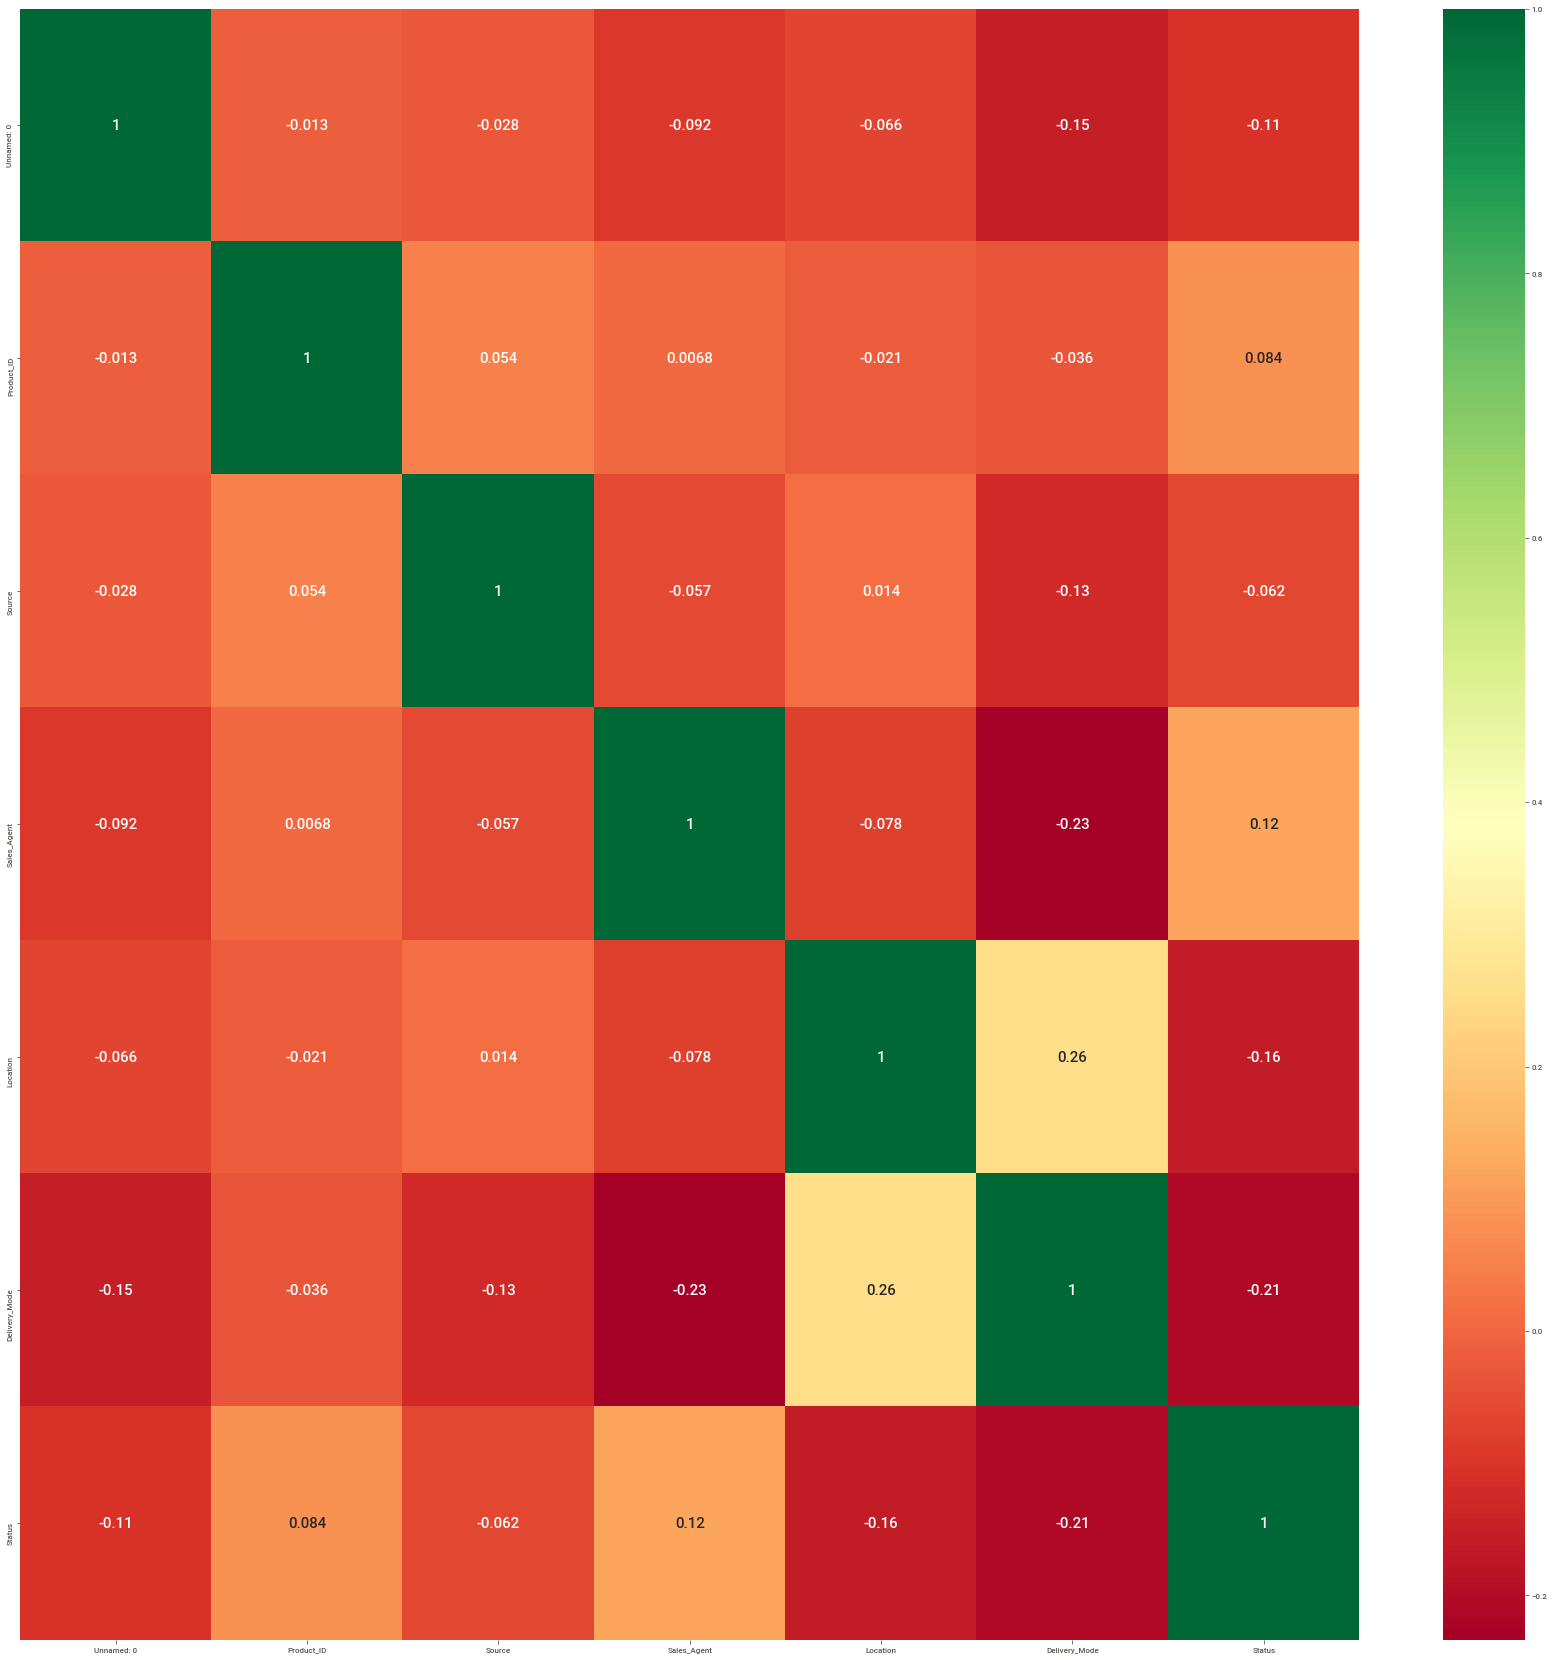

In [57]:
## Checking correlation

plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [58]:
## There is no strong correlation between the variables.

In [59]:
# droping the unnessary columns in the datset
data.drop(['Unnamed: 0','Created','Mobile','EMAIL','Product_ID'],axis=1,inplace=True)

In [60]:
data

,Source,Sales_Agent,Location,Delivery_Mode,Status
0,3,2,2,4,1
1,3,1,2,4,1
2,3,1,2,4,1
3,3,1,2,4,1
4,3,1,2,4,1
...,...,...,...,...,...
7417,1,8,1,3,0
7418,1,3,2,4,0
7419,2,2,1,0,0
7420,1,6,2,0,0


In [61]:
data.isnull().sum()

Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

# step 7:-
# Model selection and Model building

In [62]:
#checking the target variable
from collections import Counter
Counter(data.Status)

Counter({1: 2931, 0: 4491})

In [63]:
### Creating the X and y
X = data.iloc[:,:-1]
y = data.Status
X.head()


,Source,Sales_Agent,Location,Delivery_Mode
0,3,2,2,4
1,3,1,2,4
2,3,1,2,4
3,3,1,2,4
4,3,1,2,4


In [64]:
## Creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=4,test_size=0.2)
print(X_train)
print(y_train)

      Source  Sales_Agent  Location  Delivery_Mode
3781       3            6         1              4
7415       2            6         1              0
2783       1            4         1              4
2995       3            7         1              2
4125       2            4         1              0
...      ...          ...       ...            ...
6017       1           11         1              0
709        1            5         2              3
2487       3            1         2              4
174        1            9         2              4
1146       2            5         2              2

[5937 rows x 4 columns]
3781    0
7415    0
2783    1
2995    0
4125    0
       ..
6017    1
709     1
2487    1
174     0
1146    0
Name: Status, Length: 5937, dtype: int64


In [65]:
## Balancing the data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train,
                                                  y_train)


In [66]:
## Checking counts of y_train
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({0: 3606, 1: 2331})
SMOTE Classes Counter({0: 3606, 1: 3606})


# Cross validation

## model1:KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()
model1.fit(X_train_smote,y_train_smote)
ypred=model1.predict(X_test)


In [68]:
## Confusion matrix and classification report 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('“Classification Report:')
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

Confusion Matrix:
[[590 295]
 [206 394]]
“Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       885
           1       0.57      0.66      0.61       600

    accuracy                           0.66      1485
   macro avg       0.66      0.66      0.66      1485
weighted avg       0.67      0.66      0.67      1485

Accuracy: 0.6626262626262627


In [69]:
## Checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.69024199 0.64764034 0.67698887 0.64027095 0.6669419 ]
Cross validation Score: 0.664416809995011
Std : 0.018416543147604516


## model2:LogisticRegression

In [70]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_train_smote,y_train_smote)
y_training=model2.predict(X_train_smote)
y_hat2=model2.predict(X_test)


In [71]:
## Confusion matrix and classification report 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_hat2)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, y_hat2)
print('“Classification Report:')
print (result1)
result2 = accuracy_score(y_test,y_hat2)
print('Accuracy:',result2)

Confusion Matrix:
[[566 319]
 [237 363]]
“Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.64      0.67       885
           1       0.53      0.60      0.57       600

    accuracy                           0.63      1485
   macro avg       0.62      0.62      0.62      1485
weighted avg       0.64      0.63      0.63      1485

Accuracy: 0.6255892255892256


In [72]:
## Checking cross validation score
scores = cross_val_score(model2,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.64481452 0.75774087 0.66524396 0.61734457 0.64155746]
Cross validation Score: 0.6653402785133038
Std : 0.048638247943412


## model3: SVM

In [73]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(X_train_smote, y_train_smote)

SVC()

In [74]:
y_hat=model3.predict(X_test)

In [75]:
## evaluating the model created
from sklearn.metrics import accuracy_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.6444444444444445

In [76]:
## Classification report
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.77      0.58      0.66       885
           1       0.54      0.74      0.63       600

    accuracy                           0.64      1485
   macro avg       0.65      0.66      0.64      1485
weighted avg       0.68      0.64      0.65      1485



In [77]:
## Checking cross validation score
scores = cross_val_score(model3,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.66368667 0.70085172 0.67946974 0.6618823  0.66564018]
Cross validation Score: 0.6743061221598068
Std : 0.014653016745745024


## model 4: Decission tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train_smote,y_train_smote)
y_hat=dt.predict(X_test)

In [79]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score
## Training score
y_train_predict=dt.predict(X_train_smote)
acc_train=accuracy_score(y_train_smote,y_train_predict)
acc_train

0.7052135330005547

In [80]:
## Classification report
print(classification_report(y_train_smote,y_train_predict))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      3606
           1       0.70      0.72      0.71      3606

    accuracy                           0.71      7212
   macro avg       0.71      0.71      0.71      7212
weighted avg       0.71      0.71      0.71      7212



In [81]:
## Checking cross validation score
scores = cross_val_score(dt,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.72475461 0.7343664  0.70737874 0.71997689 0.70075424]
Cross validation Score: 0.7174461760484329
Std : 0.012050608531198508


## model5:Random forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train_smote,y_train_smote)

RandomForestClassifier()

In [83]:
y_predict=rf_clf.predict(X_test)

In [84]:
## Classification report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       885
           1       0.60      0.70      0.64       600

    accuracy                           0.69      1485
   macro avg       0.68      0.69      0.68      1485
weighted avg       0.70      0.69      0.69      1485



In [85]:
## Checking cross validation score
scores = cross_val_score(rf_clf,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.72912833 0.73680559 0.70906147 0.72277701 0.7017196 ]
Cross validation Score: 0.7198983994330048
Std : 0.012862651118170195


## Naive bayes


In [86]:
## Model creation
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB(var_smoothing=0.1) ## model object creation
nb.fit(X_train_smote,y_train_smote) ## fitting the model
y_hat=nb.predict(X_test) ## getting the prediction

In [87]:
## model evalution
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [88]:
## Classification report
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.68      0.63      0.65       885
           1       0.50      0.56      0.53       600

    accuracy                           0.60      1485
   macro avg       0.59      0.59      0.59      1485
weighted avg       0.61      0.60      0.60      1485



In [89]:
accuracy_score(y_test,y_hat)

0.6

In [90]:
## Checking cross validation score
scores = cross_val_score(model2,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.64481452 0.75774087 0.66524396 0.61734457 0.64155746]
Cross validation Score: 0.6653402785133038
Std : 0.048638247943412


## XGBOOST

In [91]:
## importing the model library
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation
gbm.fit(X_train_smote,y_train_smote) ## fitting the data
y_gbm=gbm.predict(X_test)

In [92]:
accuracy_score(y_test,y_gbm)

0.6747474747474748

In [93]:
## Checking cross validation score
scores = cross_val_score(gbm,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.7258701  0.76472436 0.72284257 0.73028421 0.71985527]
Cross validation Score: 0.7327153021800775
Std : 0.016371916069656482


In [94]:
## Installing XGB library
!pip3 install xgboost==1.4.2

  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.4.0
    Uninstalling xgboost-1.4.0:
      Successfully uninstalled xgboost-1.4.0


In [95]:
import xgboost
print(xgboost.__version__)


1.4.2


In [96]:
## model creation
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_smote, y_train_smote)
y_hat=model.predict(X_test)

[12:15:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [97]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [98]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [99]:
accuracy_score(y_test,y_pred)

0.6875420875420876

In [100]:
## Checking cross validation score
scores = cross_val_score(model,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 


[12:15:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:15:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:15:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:15:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## ANN

In [101]:
## model creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=1000,
                       random_state=2) ## model object creation
model.fit(X_train_smote,y_train_smote) ## training the data
y_predict_proba = model.predict_proba(X_test) ## predicting the pro
## bability of class
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train_smote)

In [102]:
y_predict_proba[-1]

array([0.35721518, 0.64278482])

In [103]:
## Evaluating the model created
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train_smote,y_train_predict))
print("Test accuracy :",accuracy_score(y_test,y_predict))

Train accuracy : 0.6145313366611204
Test accuracy : 0.5703703703703704


In [104]:
## Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.33      0.48       885
           1       0.48      0.93      0.64       600

    accuracy                           0.57      1485
   macro avg       0.68      0.63      0.56      1485
weighted avg       0.71      0.57      0.54      1485



In [105]:
## Checking cross validation score
scores = cross_val_score(model,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.72347219 0.73766548 0.6639451  0.69571174 0.5       ]
Cross validation Score: 0.6641589007074102
Std : 0.08586623884934495


### XGBOOST gives the high cross validation score(72%) so that we can select the XGBOOST alogaritham
#### and we go  HYPERPARAMETR TUNING for XGBOOST

# step 8:-
# HYPERPARAMETER TUNING

n_estimators: The number of trees in the forest.

criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.

max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split: The minimum number of samples required to split an internal node.

min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

max_features: The number of features to consider when looking for the best split.

max_leaf_nodes: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

min_impurity_split: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

bootstrap: Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.

oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy.

In [106]:
## Importing RandomizedSearchCV and collecting the best parameters of the model
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

model = XGBClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=model, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=5, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train_smote, y_train_smote)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")



Fitting 5 folds for each of 100 candidates, totalling 500 fits
[12:44:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:44:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best paramters: {'n_estimators': 1600, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True})


In [107]:
## Creating XGBClassifier with best parameters
model1 = XGBClassifier(**rf_best_params)
model1.fit(X_train_smote, y_train_smote)
y_hat=model1.predict(X_test)

[12:44:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:44:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [108]:
predictions = [round(value) for value in y_hat]

In [109]:
accuracy_score(y_test,y_hat)

0.694949494949495

# step 9
# Model Evaluation

In [110]:
## model evalution
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [111]:
## Confusion matrix and Classification report
result = confusion_matrix(y_test, y_hat)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, y_hat)
print('“Classification Report:')
print (result1)
result2 = accuracy_score(y_test,y_hat)
print('Accuracy:',result2)

Confusion Matrix:
[[613 272]
 [181 419]]
“Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       885
           1       0.61      0.70      0.65       600

    accuracy                           0.69      1485
   macro avg       0.69      0.70      0.69      1485
weighted avg       0.71      0.69      0.70      1485

Accuracy: 0.694949494949495


In [112]:
## Importing Metrics
import numpy as np
from sklearn import metrics


## Precision

In [113]:
precision_positive = metrics.precision_score(y_test, y_hat, pos_label=1)
precision_negative = metrics.precision_score(y_test, y_hat, pos_label=0)
precision_positive, precision_negative 

(0.6063675832127352, 0.7720403022670025)

## Recall and Specificity

In [114]:
recall_sensitivity = metrics.recall_score(y_test, y_hat, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_hat, pos_label=0)
recall_sensitivity, recall_specificity 

(0.6983333333333334, 0.6926553672316385)

## F1 score

In [115]:
f1_positive = metrics.f1_score(y_test, y_hat, pos_label=1)
f1_negative = metrics.f1_score(y_test, y_hat, pos_label=0)
f1_positive, f1_negative 

(0.6491092176607282, 0.7301965455628351)

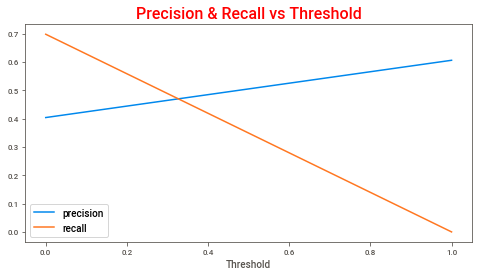

In [116]:
## Ploting Precision & Recall curve
pre, rec, thr = metrics.precision_recall_curve(y_test,y_hat)
plt.figure(figsize=(8,4))
plt.plot(thr, pre[:-1], label='precision')
plt.plot(thr, rec[1:], label='recall')
plt.xlabel('Threshold')
plt.title('Precision & Recall vs Threshold', c='r', size=16)
plt.legend()
plt.show() 

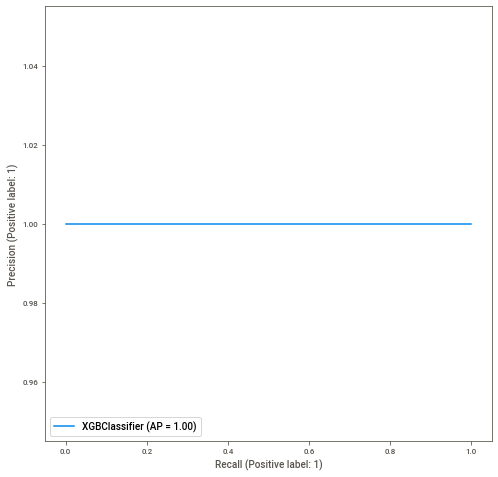

In [117]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
metrics.plot_precision_recall_curve(model1, X_test, y_hat, ax=ax) 

In [118]:
probs=model1.predict_proba(X_test)[:,1]
probs

array([0.04767696, 0.50010127, 0.6019492 , ..., 0.2112667 , 0.06352701,
       0.93162894], dtype=float32)

In [119]:
## Predicting Threshold values
def predict_threshold (model1,X_test,thresholds):
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0)

In [120]:
## Confusion matrix with Threshold values
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1):
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_hat))

Threshold : 0.0
[[613 272]
 [181 419]]
Threshold : 0.1
[[613 272]
 [181 419]]
Threshold : 0.2
[[613 272]
 [181 419]]
Threshold : 0.30000000000000004
[[613 272]
 [181 419]]
Threshold : 0.4
[[613 272]
 [181 419]]
Threshold : 0.5
[[613 272]
 [181 419]]
Threshold : 0.6000000000000001
[[613 272]
 [181 419]]
Threshold : 0.7000000000000001
[[613 272]
 [181 419]]
Threshold : 0.8
[[613 272]
 [181 419]]
Threshold : 0.9
[[613 272]
 [181 419]]


In [121]:
## Plot roc curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [122]:
from sklearn.metrics import roc_auc_score,roc_curve
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.75


In [123]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

## ROC CURVE

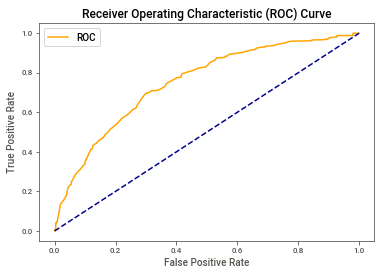

In [124]:
import matplotlib.pyplot as plt
plot_roc_curve(fpr, tpr)

## PR vs ROC curve
 ROC curves can present an overly optimistic view of an algorithm’s performance if there is a large skew in the class distribution.Precision-Recall (PR) curves, often used in Information Retrieval , have been cited as an alternative to ROC curves for tasks with a large skew in the class distribution.

# Conclusion

### We selected XGBoost algorithm as it gives the best cross validation score .Therefore the cross validation score is 73 and accuracy is 70.